In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



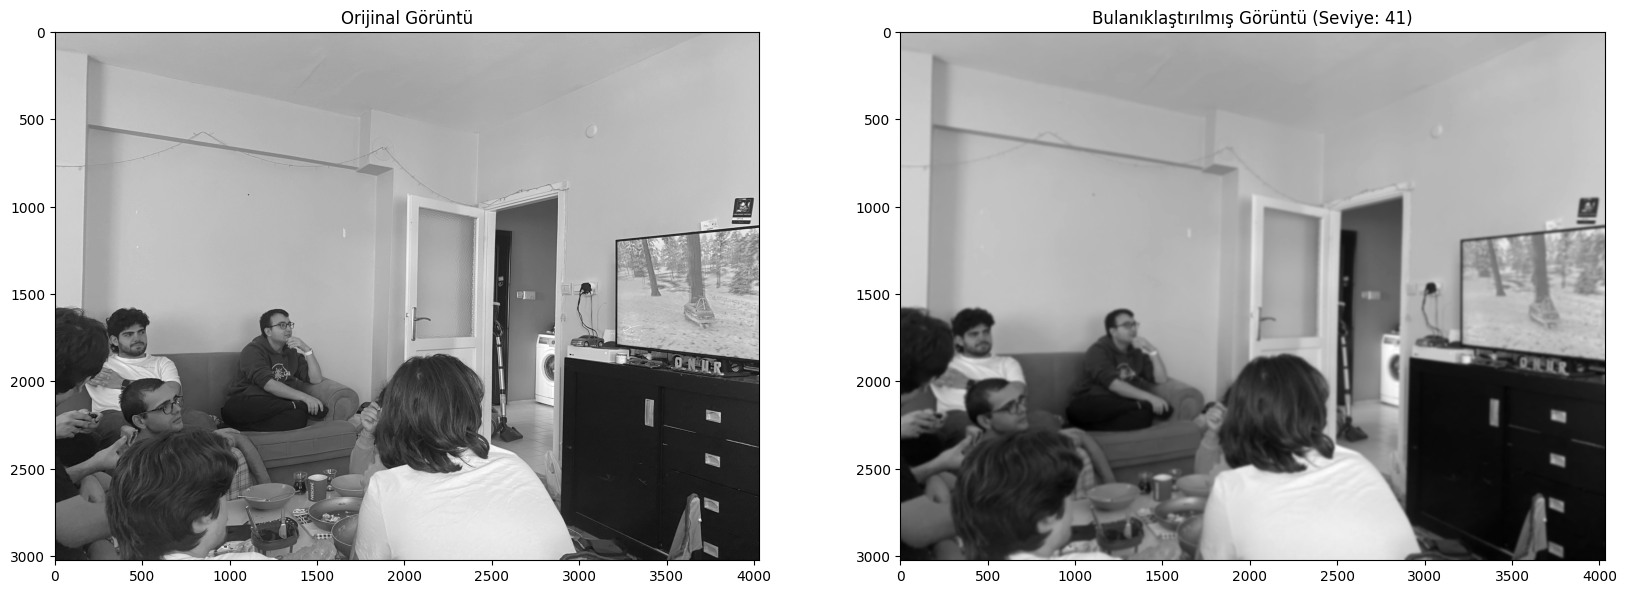

In [10]:
# 1. Görüntüyü Okuma
image_path = "data/IMG_6436.jpeg"  # Görüntü yolunu buraya ekleyin
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Gri tonlamalı olarak yükleyin

# Görüntünün başarıyla okunup okunmadığını kontrol et
if image is None:
    print(f"Hata: '{image_path}' yolu bulunamadı veya dosya açılamadı. Lütfen dosya yolunu kontrol edin.")
else:
    # 2. Gaussian Blur kullanarak bulanıklaştırma
    blur_level = 41  # Bulanıklık seviyesi, bu değer arttıkça bulanıklık artar
    blurred_image = cv2.GaussianBlur(image, (blur_level, blur_level), 0)

    # 3. Sonucu Görüntüleme
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.title("Orijinal Görüntü")
    plt.imshow(image, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title(f"Bulanıklaştırılmış Görüntü (Seviye: {blur_level})")
    plt.imshow(blurred_image, cmap="gray")

    plt.show()

Kenar algılama sonucu 'output/edges_output.jpeg' olarak kaydedildi.


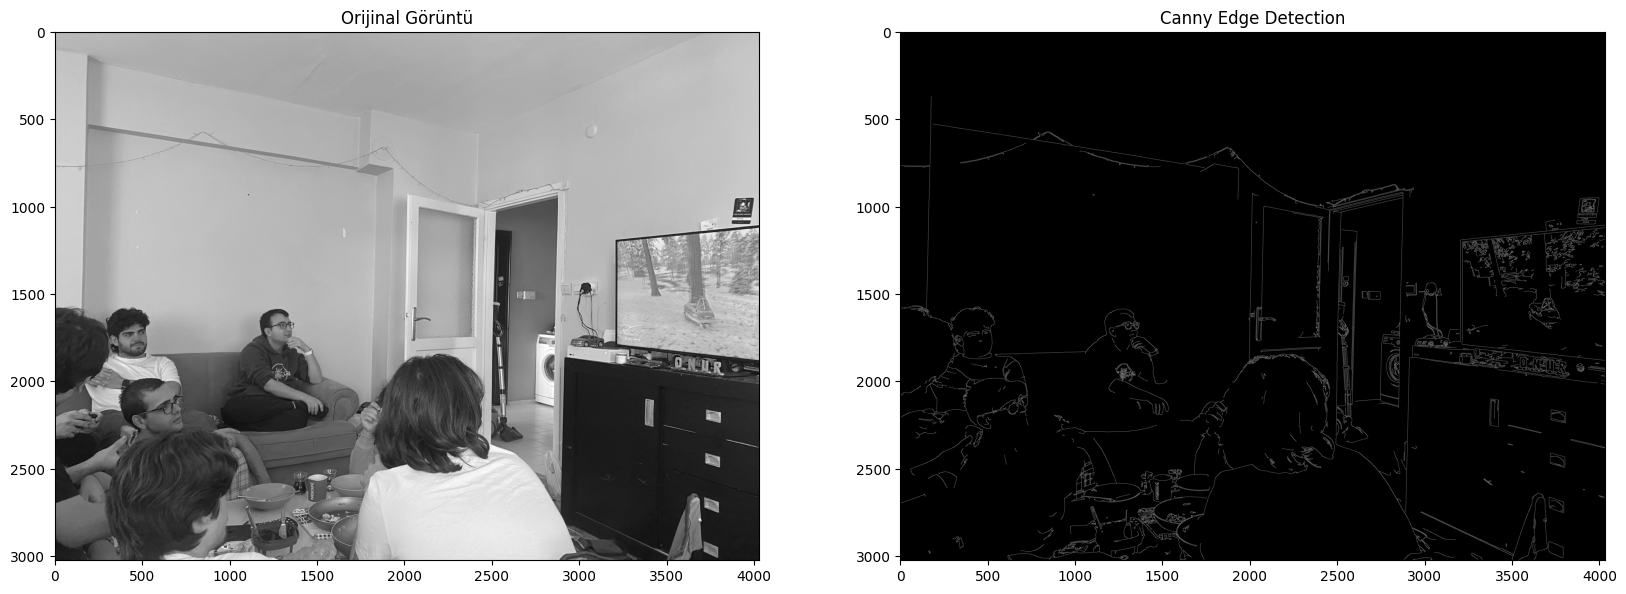

In [13]:
# Görüntünün başarıyla okunup okunmadığını kontrol et
if image is None:
    print(f"Hata: '{image_path}' yolu bulunamadı veya dosya açılamadı. Lütfen dosya yolunu kontrol edin.")
else:
    # 2. Gaussian Blur ile gürültüyü azaltma
    blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

    # 3. Canny Edge Detection
    lower_threshold = 50  # Alt eşik değeri
    upper_threshold = 150  # Üst eşik değeri
    edges = cv2.Canny(blurred_image, lower_threshold, upper_threshold)

    # 4. Kenar Algılama Sonucunu Kaydetme
    output_path = "output/edges_output.jpeg"  # Sonuç görüntüsünün kaydedileceği yol
    cv2.imwrite(output_path, edges)
    print(f"Kenar algılama sonucu '{output_path}' olarak kaydedildi.")

    # 5. Sonucu Görüntüleme
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.title("Orijinal Görüntü")
    plt.imshow(image, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Canny Edge Detection")
    plt.imshow(edges, cmap="gray")

    plt.show()

Kenar algılama sonucu 'output/sobel_output.jpeg' olarak kaydedildi.


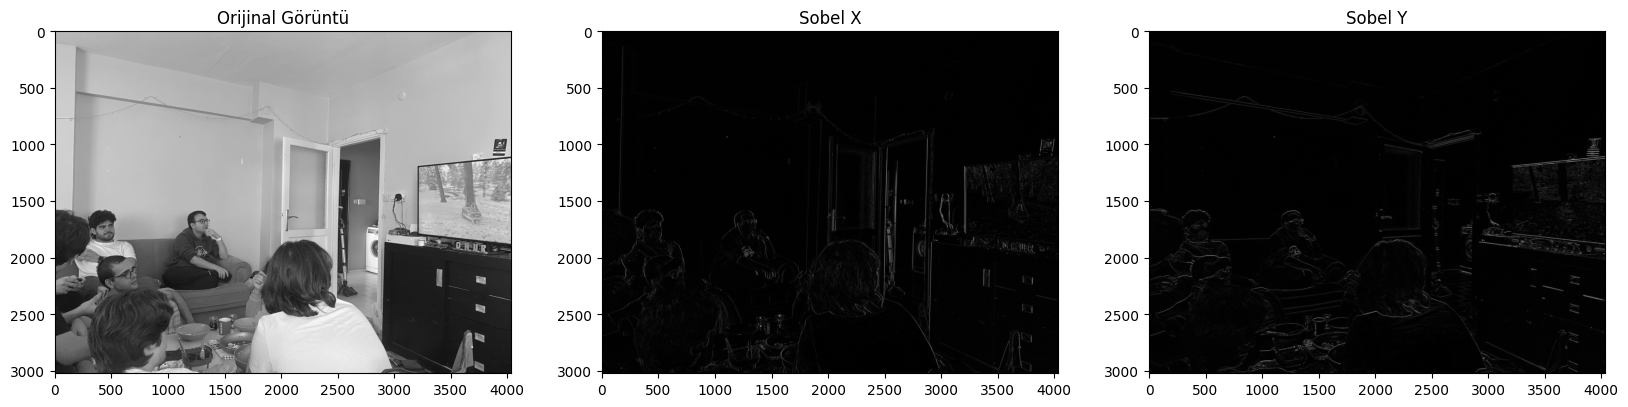

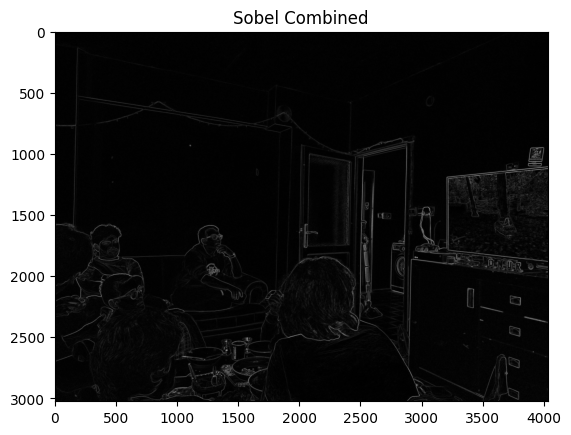

In [14]:
# Görüntünün başarıyla okunup okunmadığını kontrol et
if image is None:
    print(f"Hata: '{image_path}' yolu bulunamadı veya dosya açılamadı. Lütfen dosya yolunu kontrol edin.")
else:
    # 2. Gaussian Blur ile gürültüyü azaltma
    blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

    # 3. Sobel Kenar Algılama
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)  # X yönünde Sobel
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)  # Y yönünde Sobel

    # X ve Y yönündeki kenarları birleştirme
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    # 4. Kenar Algılama Sonucunu Kaydetme
    output_path = "output/sobel_output.jpeg"  # Sonuç görüntüsünün kaydedileceği yol
    cv2.imwrite(output_path, sobel_combined)
    print(f"Kenar algılama sonucu '{output_path}' olarak kaydedildi.")

    # 5. Sonucu Görüntüleme
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.title("Orijinal Görüntü")
    plt.imshow(image, cmap="gray")

    plt.subplot(1, 3, 2)
    plt.title("Sobel X")
    plt.imshow(np.absolute(sobel_x), cmap="gray")

    plt.subplot(1, 3, 3)
    plt.title("Sobel Y")
    plt.imshow(np.absolute(sobel_y), cmap="gray")

    plt.show()

    # Kombine Sobel Kenarlarını Görüntüleme
    plt.figure()
    plt.title("Sobel Combined")
    plt.imshow(sobel_combined, cmap="gray")
    plt.show()

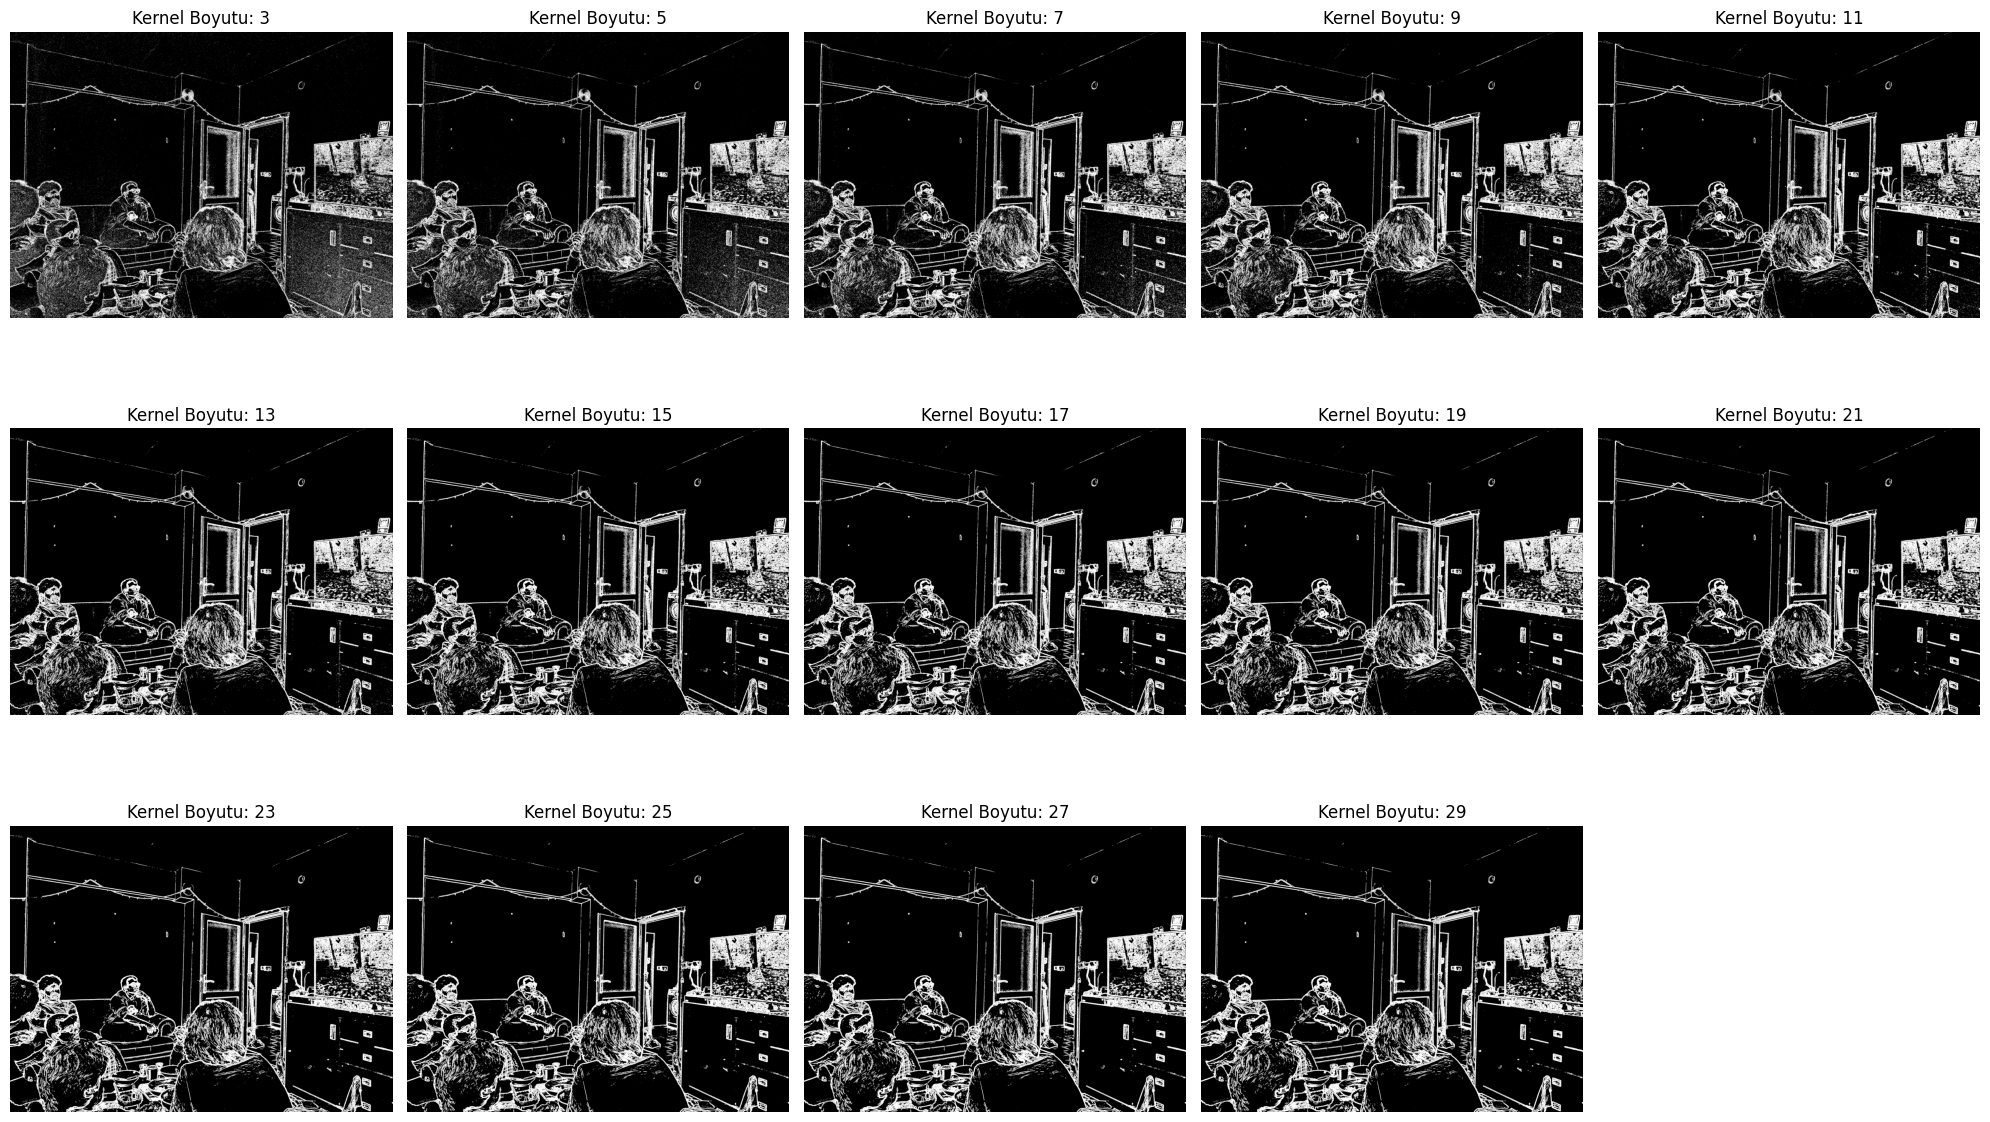

In [33]:
# Görüntünün başarıyla okunup okunmadığını kontrol et
if image is None:
    print(f"Hata: '{image_path}' yolu bulunamadı veya dosya açılamadı. Lütfen dosya yolunu kontrol edin.")
else:
    # Kernel boyutlarını 3 ile 45 arasında belirliyoruz (2'şer artarak)
    kernel_sizes = range(3, 31, 2)

    # Görüntüleme için figür ayarı
    plt.figure(figsize=(20, 20))
    
    for i, ksize in enumerate(kernel_sizes):
        # Sobel filtresi uygula (x ve y yönünde)
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)

        # Gradyan büyüklüğünü hesapla
        gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

        # Adaptif eşikleme uygula
        adaptive_threshold = np.percentile(gradient_magnitude, 85)
        _, edges = cv2.threshold(gradient_magnitude, adaptive_threshold, 255, cv2.THRESH_BINARY)
        
        # Her bir kernel boyutunun çıktısını görselleştirme
        plt.subplot(5, 5, i + 1)
        plt.title(f"Kernel Boyutu: {ksize}")
        plt.imshow(edges, cmap="gray")
        plt.axis("off")
    
    # Sonuçları göster
    plt.tight_layout()
    plt.show()